# Image Feature Generation 

This notebook demonstrate how to use base image manipulation operations
1. Convolution
2. Thresholding
3. Pooling

To generate features that are useful for classification and are not dependent on absolute pixel positioning of images

## Preliminaries

In [1]:
import os
import pickle
from PIL import Image, ImageDraw

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

from skimage.measure import block_reduce
from skimage.filters import sobel_h,sobel_v

%matplotlib inline



## Generate Geometrical Shapes

In [2]:
S=200
DS=40

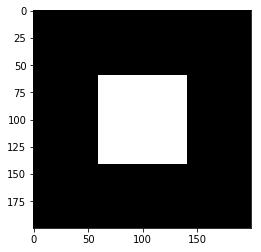

In [3]:
image= Image.new('L', (S, S))
drawable=ImageDraw.Draw(image)
drawable.rectangle( ((S/2-DS,S/2-DS),(S/2+DS,S/2+DS)),fill="white",outline="white")
square=np.array(image)  
plt.imshow(square,cmap="gray")

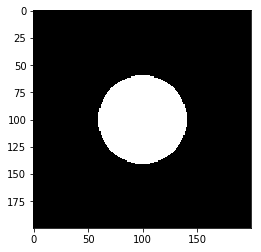

In [4]:
image= Image.new('L', (S, S))
drawable=ImageDraw.Draw(image)
drawable.ellipse( ((S/2-DS,S/2-DS),(S/2+DS,S/2+DS)),fill="white",outline="white")
circle=np.array(image)  
plt.imshow(circle,cmap="gray")

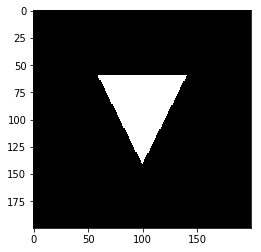

In [5]:
image= Image.new('L', (S, S))
drawable=ImageDraw.Draw(image)
drawable.polygon( ((S/2-DS, S/2-DS), (S/2+DS, S/2-DS),(S/2,S/2+DS)),fill="white",outline="white")
triangle=np.array(image)  
plt.imshow(triangle,cmap="gray")

## Image Convolution

The we compute
$$
    G^\theta_{x,y} = cos(\theta) (S_1*I)_{x,y} + sin(\theta)*(S_2*I)_{x,y}
$$

for $\theta =2 \pi\, k/K$, $k=0,1,\dots,K-1$, and  $K=128$

In [6]:
theta=np.linspace(0,2*np.pi,128)
theta.shape

(128,)

In [7]:
def gradient(image,theta):
    grad_x=sobel_v(image)
    grad_y=sobel_h(image)
    grad=np.cos(theta[:,np.newaxis,np.newaxis])*grad_x[np.newaxis,:,:]+np.sin(theta[:,np.newaxis,np.newaxis])*grad_y[np.newaxis,:,:]
    return grad

In [8]:
G_square=gradient(square,theta)
G_circle=gradient(circle,theta)
G_triangle=gradient(triangle,theta)

In [9]:
G_square.shape

(128, 200, 200)

In [10]:
def compare_figures(figs):
    plt.figure(figsize=(14, 10))
    idx0=0
    idx1=int(128/8)
    idx2=int(128/4)
    idx3=int(128*3/4)
    fig=figs[0]
    plt.subplot(3,4,1)
    plt.imshow(fig[idx0],cmap="gray")
    plt.subplot(3,4,2)
    plt.imshow(fig[idx1],cmap="gray")
    plt.subplot(3,4,3)
    plt.imshow(fig[idx2],cmap="gray")
    plt.subplot(3,4,4)
    plt.imshow(fig[idx3],cmap="gray")
    
    fig=figs[1]
    plt.subplot(3,4,5)
    plt.imshow(fig[idx0],cmap="gray")
    plt.subplot(3,4,6)
    plt.imshow(fig[idx1],cmap="gray")
    plt.subplot(3,4,7)
    plt.imshow(fig[idx2],cmap="gray")
    plt.subplot(3,4,8)
    plt.imshow(fig[idx3],cmap="gray")
    
    fig=figs[2]
    plt.subplot(3,4,9)
    plt.imshow(fig[idx0],cmap="gray")
    plt.subplot(3,4,10)
    plt.imshow(fig[idx1],cmap="gray")
    plt.subplot(3,4,11)
    plt.imshow(fig[idx2],cmap="gray")
    plt.subplot(3,4,12)
    plt.imshow(fig[idx3],cmap="gray")

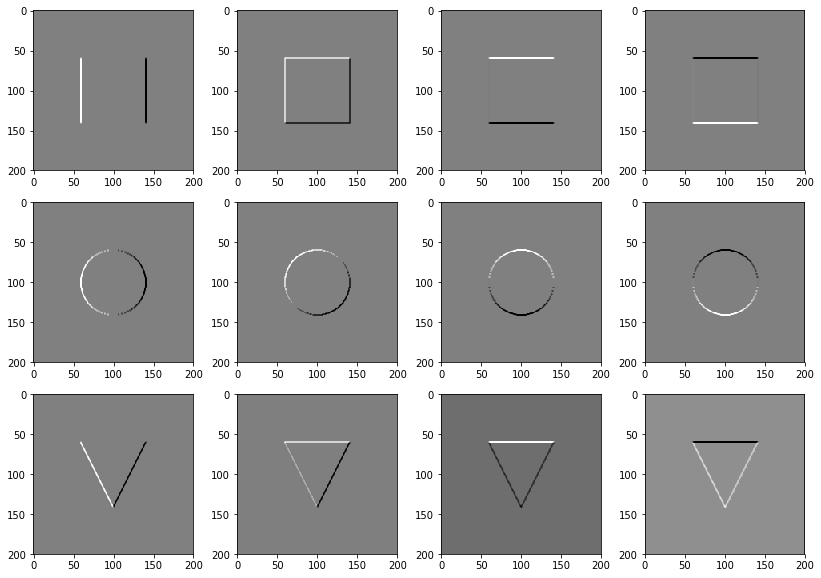

In [11]:
compare_figures([G_square,G_circle,G_triangle])

## Thresholding

In [12]:
F_square=np.maximum(0,G_square)
F_circle=np.maximum(0,G_circle)
F_triangle=np.maximum(0,G_triangle)

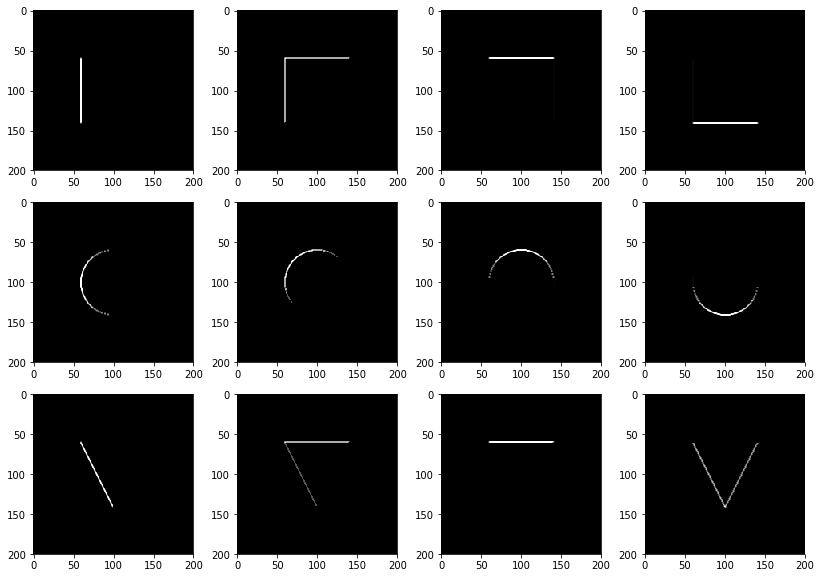

In [13]:
compare_figures([F_square,F_circle,F_triangle])

## Pooling

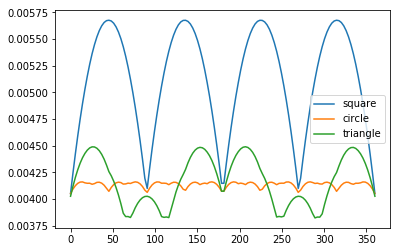

In [14]:
block=(1,S,S)
P_square=block_reduce(F_square,block,np.mean).ravel()
P_circle=block_reduce(F_circle,block,np.mean).ravel()
P_triangle=block_reduce(F_triangle,block,np.mean).ravel()
plt.plot(theta*180/np.pi,P_square,label="square")
plt.plot(theta*180/np.pi,P_circle,label="circle")
plt.plot(theta*180/np.pi,P_triangle,label="triangle")
plt.legend()

## Shifted Images

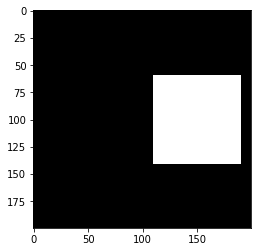

In [15]:
image= Image.new('L', (S, S))
drawable=ImageDraw.Draw(image)
drawable.rectangle( ((S/2+50-DS,S/2-DS),(S/2+DS+50,S/2+DS)),fill="white",outline="white")
shifted1_square=np.array(image)  
plt.imshow(shifted1_square,cmap="gray")

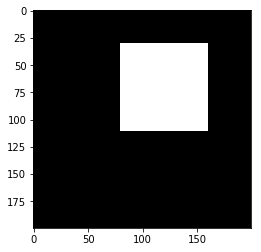

In [16]:
image= Image.new('L', (S, S))
drawable=ImageDraw.Draw(image)
drawable.rectangle( ((S/2+20-DS,S/2-DS-30),(S/2+DS+20,S/2+DS-30)),fill="white",outline="white")
shifted2_square=np.array(image)  
plt.imshow(shifted2_square,cmap="gray")

In [17]:
G_shifted1=gradient(shifted1_square,theta)
G_shifted2=gradient(shifted2_square,theta)

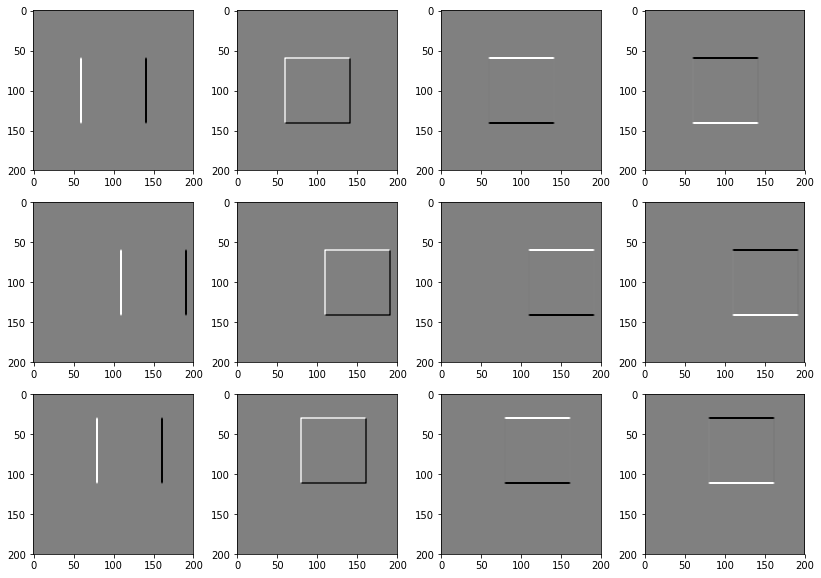

In [18]:
compare_figures([G_square,G_shifted1,G_shifted2])

In [19]:
F_shifted1=np.maximum(0,G_shifted1)
F_shifted2=np.maximum(0,G_shifted2)

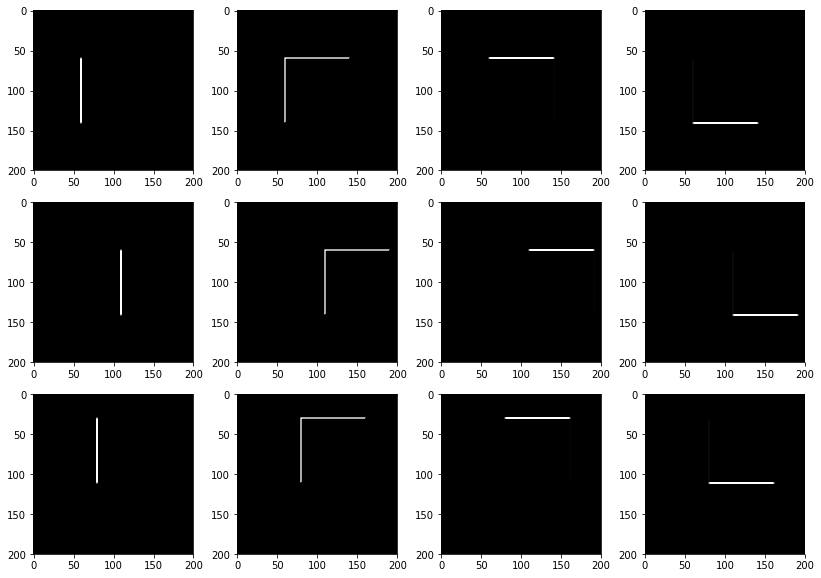

In [20]:
compare_figures([F_square,F_shifted1,F_shifted2])

In [21]:
P_shifted1=block_reduce(F_shifted1,block,np.mean).ravel()
P_shifted2=block_reduce(F_shifted2,block,np.mean).ravel()

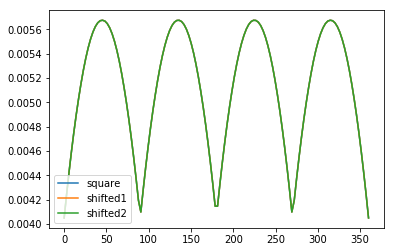

In [22]:
plt.plot(theta*180/np.pi,P_square,label="square")
plt.plot(theta*180/np.pi,P_shifted1,label="shifted1")
plt.plot(theta*180/np.pi,P_shifted2,label="shifted2")
plt.legend()